In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [2]:
!git clone https://github.com/gowun/MABTest.git

Cloning into 'MABTest'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 66 (delta 36), reused 55 (delta 25), pack-reused 0
Unpacking objects: 100% (66/66), done.


In [0]:
from MABTest import simulator as sim
from MABTest import utils as ut

In [0]:
import os
import time
import pickle
import datetime
import matplotlib.pyplot as plt
import multiprocessing

In [5]:
#start_time = time.time()
posProb = [1.0]
itemProb = [0.45, 0.44, 0.40, 0.25, 0.05]
K = len(itemProb)
L = len(posProb)
itemid = [i for i in range(K)]

expCount = 50
stepCount = 1000
sm = sim.Simulator(itemid, posProb, itemProb)
log_fname='log/'+datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S.')

with multiprocessing.Pool(10) as p:
  exp_result = p.map(sm.run, [{'step_cnt':stepCount, 'log_fname':log_fname} for _ in range(expCount)])
base = exp_result[0][0]
plots = sum([i for _, i in exp_result])
plots = plots / float(expCount)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
10 1000
10 1000
20 1000
20 1000
20 1000
10 1000
10 1000
10 1000
10 1000
10 1000
10 1000
10 1000
30 1000
30 1000
30 1000
20 1000
20 1000
20 1000
20 1000
20 1000
20 1000
20 1000
40 1000
40 1000
40 1000
30 1000
30 1000
30 1000
30 1000
30 1000
30 1000
30 1000
50 1000
50 1000
50 1000
40 1000
40 1000
40 1000
40 1000
40 1000
40 1000
40 1000
60 1000
60 1000
60 1000
50 1000
50 1000
50 1000
50 1000
50 1000
50 1000
70 1000
50 1000
60 1000
70 1000
60 1000
70 1000
60 1000
60 1000
60 1000
80 1000
60 1000
60 1000
70 1000
70 1000
70 1000
80 1000
80 1000
70 1000
90 1000
70 1000
70 1000
70 1000
80 1000
80 1000
90 1000
90 1000
80 1000
80 1000
80 1000
100 1000
80 1000
80 1000
100 1000
90 1000
90 1000
100 1000
90 1000
90 1000
90 1000
110 1000
90 1000
110 1000
110 1000
90 1000
100 1000
100 1000
100 1000
120 1000
100 1000
120 1000
100 1000
100 1000
120 1000
110 1000
100 1000
110 1000
130 1000
110 1000
130 1000
110 1000
110 1000
110 1000
130 1000
120 1000
110 1000
120 1000


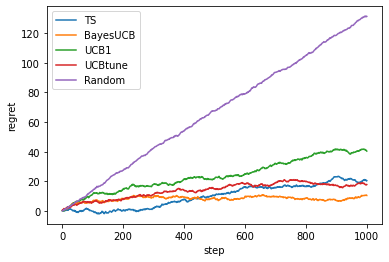

In [6]:
labels = ['TS', 'BayesUCB', 'UCB1', 'UCBtune', 'Random']
ut.comparison_figure(base, plots, labels, 'step', 'regret')

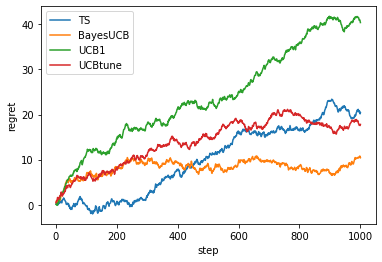

In [7]:
ut.comparison_figure(base, list(plots)[:-1], labels[:-1], 'step', 'regret')